In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [3]:
# pull through data from csv

df = pd.read_csv('WSLxg.csv')
df.head()

,Number,Team,MP,xG,xGA,xGD,GF,GA,xG vs Actual
0,1,Chelsea FC Women,15,2.26,1.15,1.11,3.00,0.87,0.74
1,2,Manchester City Women,15,2.00,0.91,1.09,2.53,0.60,0.53
2,3,Arsenal FC Women,15,1.87,0.91,0.96,2.20,0.93,0.33
3,4,Manchester United WFC,15,1.77,1.24,0.53,2.13,1.27,0.36
4,5,Aston Villa LFC,15,1.55,1.62,-0.07,1.27,2.07,-0.28


In [4]:
# adding in .png to be able to pull through each team's club badge

df['path'] = df['Team'] + '.png'
df.head()

,Number,Team,MP,xG,xGA,xGD,GF,GA,xG vs Actual,path
0,1,Chelsea FC Women,15,2.26,1.15,1.11,3.00,0.87,0.74,Chelsea FC Women.png
1,2,Manchester City Women,15,2.00,0.91,1.09,2.53,0.60,0.53,Manchester City Women.png
2,3,Arsenal FC Women,15,1.87,0.91,0.96,2.20,0.93,0.33,Arsenal FC Women.png
3,4,Manchester United WFC,15,1.77,1.24,0.53,2.13,1.27,0.36,Manchester United WFC.png
4,5,Aston Villa LFC,15,1.55,1.62,-0.07,1.27,2.07,-0.28,Aston Villa LFC.png


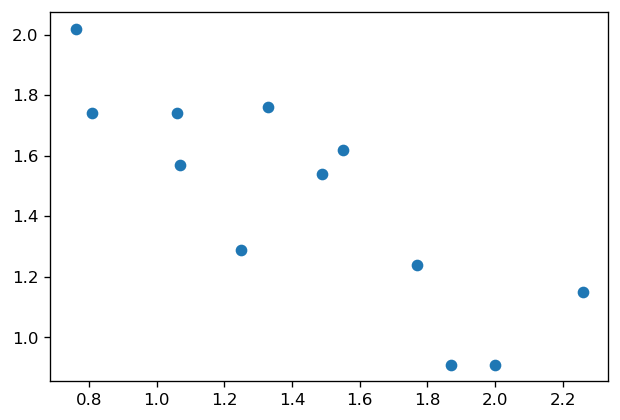

In [5]:
# create a scatterplot with xG (x axis) and xG Against (y axis)
# However, this doesn't tell us which team is which...

fig, ax = plt.subplots(figsize=(6, 4), dpi = 120)
ax.scatter(df['xG'], df['xGA'])

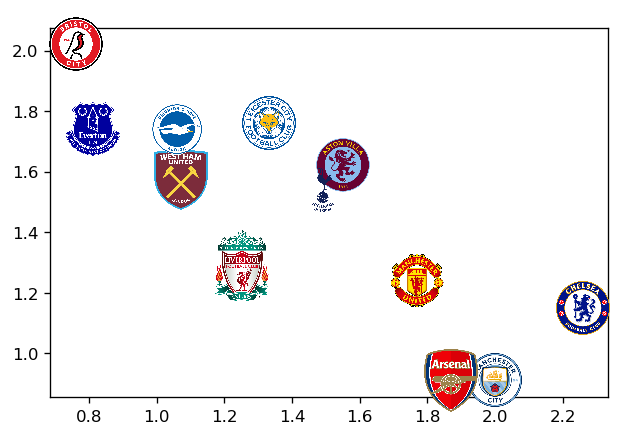

In [6]:
# adding in club badges to clearly see the xG of each team

fig, ax = plt.subplots(figsize=(6, 4), dpi = 120)
ax.scatter(df['xG'], df['xGA'], color = 'white')

def getImage(path):
    return OffsetImage(plt.imread(path), zoom = .04, alpha = 1)

for index, row in df.iterrows():
    ab = AnnotationBbox(getImage(row['path']), (row['xG'], row['xGA']), frameon = False)
    ax.add_artist(ab)

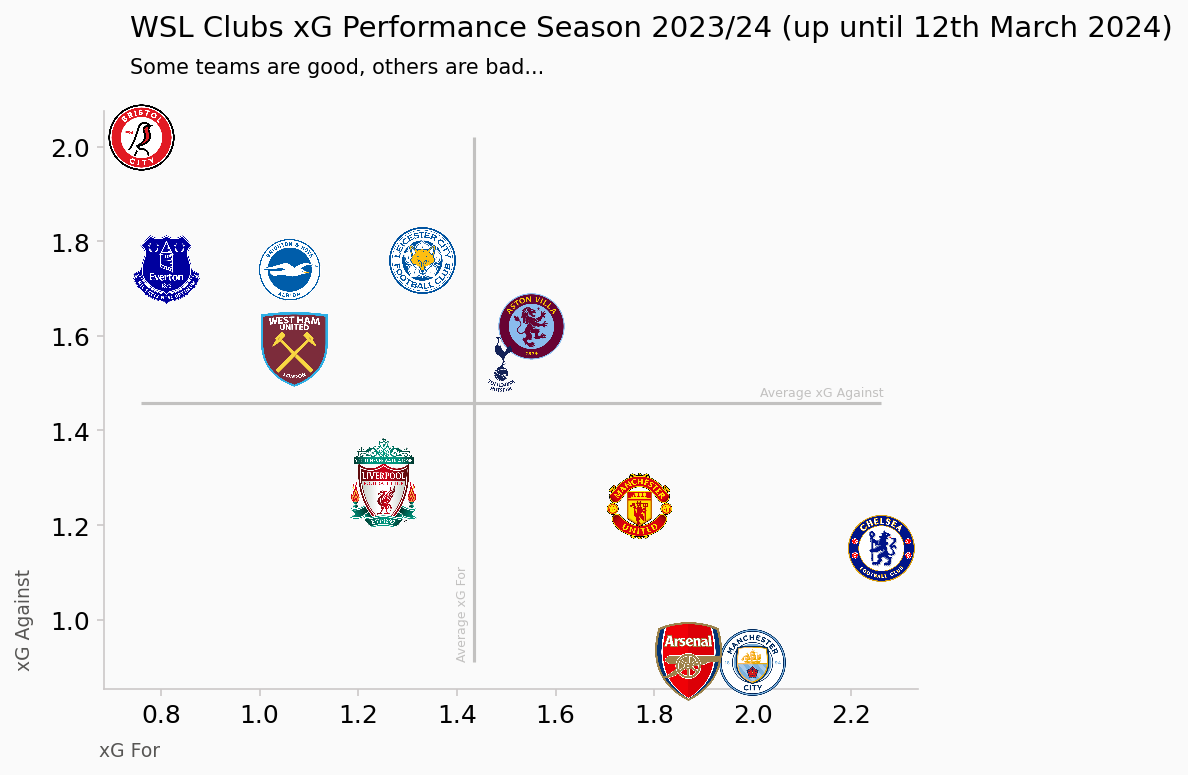

In [62]:
# Improving the above chart

# Set font and background colour
plt.rcParams.update({'font.family':'DejaVu Sans'})
bgcol = '#fafafa'

#Create initial plot
fig, ax = plt.subplots(figsize=(7, 5), dpi=150)
fig.set_facecolor(bgcol)
ax.set_facecolor(bgcol)
ax.scatter(df['xG'], df['xGA'], c=bgcol)

# Change plot spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_color('#ccc8c8')
ax.spines['bottom'].set_color('#ccc8c8')

# Change ticks
plt.tick_params(axis='x', labelsize=12, color='#ccc8c8')
plt.tick_params(axis='y', labelsize=12, color='#ccc8c8')

#Plot Club badges
def getImage(path):
    return OffsetImage(plt.imread(path), zoom=.04, alpha = 1)

for index, row in df.iterrows():
    ab = AnnotationBbox(getImage(row['path']), (row['xG'], row['xGA']), frameon=False)
    ax.add_artist(ab)
    
# Add in average lines
plt.hlines(df['xGA'].mean(), df['xG'].min(), df['xG'].max(), color='#c2c1c0')
plt.vlines(df['xG'].mean(), df['xGA'].min(), df['xGA'].max(), color='#c2c1c0')

# Text - title and comment
fig.text(.15, .98, 'WSL Clubs xG Performance Season 2023/24 (up until 12th March 2024)', size=14)
fig.text(.15, .93, 'Some teams are good, others are bad...', size=10)

# Average line explanation
fig.text(.04, .14, 'xG Against', size = 9, color='#575654', rotation = 90)
fig.text(.12, 0.02, 'xG For', size = 9, color='#575654')

# Axis titles
fig.text(.75, .500, 'Average xG Against', size = 6, color='#c2c1c0')
fig.text(.460, .15, 'Average xG For', size = 6, color='#c2c1c0', rotation = 90)

# Save plot
plt.savefig('WSL_202324_xG_Chart.png', dpi = 1200, bbox_inches = 'tight')